# AMR Data

### Key questions: 

What is more likely to drive resistance: Total cumulative abx usage, or recent abx usage
Does the presence of other organisms affect the likelihood of resistance?
Are some combinations of antibiotics less likely to result in resistance?
Do some combination results in antibiotic resistance to other antibiotics, i.e. collateral resistance


### Population:
Samples positive for Pseudomonas ; (See Pseudomonas variable in Micro dictionary)


### Ideal Input Variables
Lung function	AdmFev

Total Cumulative days of each antibiotic before the respective sample	To be made

Total Cumulative days of each antibiotic combination before the respective sample	To be made

Number of days before a sample that each antibiotic was last used	To be made

Maximum number of days each antibiotic combination was used successively	To be made

Presence of other organisms in the sample	"Organism" - more than one name. Could perhaps count the organisms based on a "," as this delinieates them

### Output variables:	
Resistance to each antibiotic: If binary can do yes/no to resistance (='R') for each antibiotic or could do yes/no for multi-drug resistance (='R' in 3 or more drugs). Focus only on the following 5 drugs (Ciprofloxacin, Ceftazidime, Meropenem, PipTaz, Tobramycin)	Found in Micro data. 


### attributes information 

StudyNumber:	Anonymised data linkage code for patient

Date:	Date of sample	

ORG:	Codes of organismls found in that sample	

Organism:	Names of organisms found in that sample	

ORG:	The organism that the resistance data refers ti	

Pseudomonas:	Specimen relates to Pseudomonas. 	NB for this study we will only perform in Pseudomonas = 1 cohort

Specimen:	Unique Specimen ID	

Ciprofloxacin, Ceftazidime, Meropenem, Pip/Tazo	,Tob:	These are all individual antibiotics. When tested they have a code for the resistance result: S= sensitive, I=intermediate, R=resistant. D= I'm not sure yet and have sought clarification, we may end up excluding these	
	
		
MDR:	Multi-Drug Resistance 	

ValidLungFunction:	Valid lung function result for this admission	TRUE/FALSE. Not all patients have clean lung function tests at beginning and end of admission so some are labelled FALSE. Their lung function results are empty

Type:	Inpatient or Outpatient IV abx	Outpatient IV abx have been removed as data is incomplete and makes only a tiny proportion of abx

Year!	Year of antibiotic presciption

Month:	Month of antibiotic presciption	

LOS:	Length of Stay in hospital	

Admitted:	Date of Admission to Hospital	

AdmCode	: StudyNum combined with Admitted	

AdmFev:	Lung function on admission to hospital	Fev = Forced expiratory volume, aka lung function

Discharged:	Date of Discharge from Hospital	

DiscFev:	Lung function on discharge from hospital	

DelFev:	Change in lung function (i.e DiscFev - AdmFev)	

Medication:	Name of antibiotic	

Requested:	Date antbiotic started	

Stopped:	Date antibiotic stopped	

OrderStatusCode:	Code telling us why the antibiotic was stopped	DISC= Discontinued,DISCD=Discharged home, COMP=Completed

IVDays:	Number of days the antibiotic was received (i.e. Requested - Stopped)	

DeceasedDate:	Date of Death	Some of these appear to be missing I will investigate

		


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np


In [60]:
Ivabx = pd.read_excel('IVabxanonymised.xlsx')
Ivabx.head(405)

Ivabx['DeceasedDate']= pd.to_datetime(Ivabx['DeceasedDate'])
Ivabx['Requested']= pd.to_datetime(Ivabx['Requested'])
Ivabx['Discharged']= pd.to_datetime(Ivabx['Discharged'])
Ivabx['Stopped']= pd.to_datetime(Ivabx['Stopped'])

Ivabx.info()
Ivabx.head(405)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8401 entries, 0 to 8400
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   StudyNum           8401 non-null   int64         
 1   ValidLungFunction  8401 non-null   bool          
 2   Type               8401 non-null   object        
 3   Year               8401 non-null   int64         
 4   Month              8401 non-null   int64         
 5   LOS                8401 non-null   object        
 6   Admitted           8401 non-null   int64         
 7   AdmCode            8401 non-null   int64         
 8   AdmFev             5894 non-null   float64       
 9   Discharged         8401 non-null   datetime64[ns]
 10  DiscFev            5894 non-null   float64       
 11  DelFev             5894 non-null   float64       
 12  Medication         8401 non-null   object        
 13  Requested          8401 non-null   datetime64[ns]
 14  Stopped 

,StudyNum,ValidLungFunction,Type,Year,Month,LOS,Admitted,AdmCode,AdmFev,Discharged,DiscFev,DelFev,Medication,Requested,Stopped,OrderStatusCode,IVDays,DeceasedDate
0,1,True,Inpatient,2013,7,7,41465,141465,50.0,2013-07-17,51.0,1.0,Meropenem,2013-07-10,2013-07-17,DISCD,8,NaT
1,1,True,Inpatient,2013,7,7,41465,141465,50.0,2013-07-17,51.0,1.0,Tobramycin,2013-07-10,2013-07-17,DISCD,8,NaT
2,1,False,Inpatient,2013,9,10,41537,141537,NaN,2013-09-30,NaN,NaN,Meropenem,2013-09-20,2013-09-27,DISC,8,NaT
3,1,False,Inpatient,2013,9,10,41537,141537,NaN,2013-09-30,NaN,NaN,Tobramycin,2013-09-20,2013-09-23,DISC,4,NaT
4,1,False,Inpatient,2013,9,10,41537,141537,NaN,2013-09-30,NaN,NaN,Tobramycin,2013-09-23,2013-09-25,DISC,3,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,6,True,Inpatient,2021,12,17,44537,644537,22.0,2021-12-24,24.0,2.0,Tobramycin,2021-12-07,2021-12-08,DISC,2,NaT
401,6,True,Inpatient,2021,12,17,44537,644537,22.0,2021-12-24,24.0,2.0,Tobramycin,2021-12-08,2021-12-24,DISCD,17,NaT
402,7,True,Inpatient,2013,8,15,41494,741494,56.0,2013-08-23,61.0,5.0,Ceftazidime,2013-08-08,2013-08-16,DISC,9,2020-03-22 10:45:00
403,7,True,Inpatient,2013,8,15,41494,741494,56.0,2013-08-23,61.0,5.0,Colistimethate,2013-08-08,2013-08-16,DISC,9,2020-03-22 10:45:00


In [61]:
mc = pd.read_excel('MicroCombinedAnonymised.xlsx')
mc = mc.drop("Organism", axis=1)
mc.info()
mc.head(4)
mc.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   StudyNumber     16800 non-null  int64         
 1   Date            16800 non-null  datetime64[ns]
 2   ORG             16800 non-null  object        
 3   NumberOrganism  0 non-null      float64       
 4   ORG.1           14491 non-null  object        
 5   Pseudomonas     16800 non-null  int64         
 6   Specimen        14491 non-null  object        
 7   Ciprofloxacin   14099 non-null  object        
 8   Ceftazidime     11688 non-null  object        
 9   Meropenem       12276 non-null  object        
 10  Pip/Tazo        11792 non-null  object        
 11  Tob             8589 non-null   object        
 12  MDR             10552 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.7+ MB


(16800, 13)

In [62]:
# Plot count of classes in a feature
def count_plot(df,col_name,title="",fig_height =15, fig_width =12, save_fig_name=None, subplot_row=2, subplot_col=1, subplot_num=1):
    fig = plt.figure(figsize=(fig_width,fig_height))
    plt.subplot(subplot_row, subplot_col, subplot_num)
    plt.yticks(fontsize=16)

    plt.title(title, fontsize=15)
    ax = sns.countplot(data=df,  y=col_name)
    total = len(df[col_name])
    for p in ax.patches:
            percentage = '{:.2f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    
    if(save_fig_name == None):
        return plt
    else:
        plt.savefig(save_fig_name+".png", dpi=300, bbox_inches='tight')
        return plt
    
# plot count of data point in features 
def class_plot(df,feature,title="", save_fig_name=None):
    d = df[[feature,'MDR']]
    d.groupby('MDR')[feature].value_counts().unstack(0).plot.barh(figsize=(20,15))
    plt.title(title)
    if(save_fig_name == None):
        return plt
    else:
        plt.savefig(save_fig_name+".png", dpi=300, bbox_inches='tight')
        return plt 



<module 'matplotlib.pyplot' from 'C:\\Users\\sarah\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

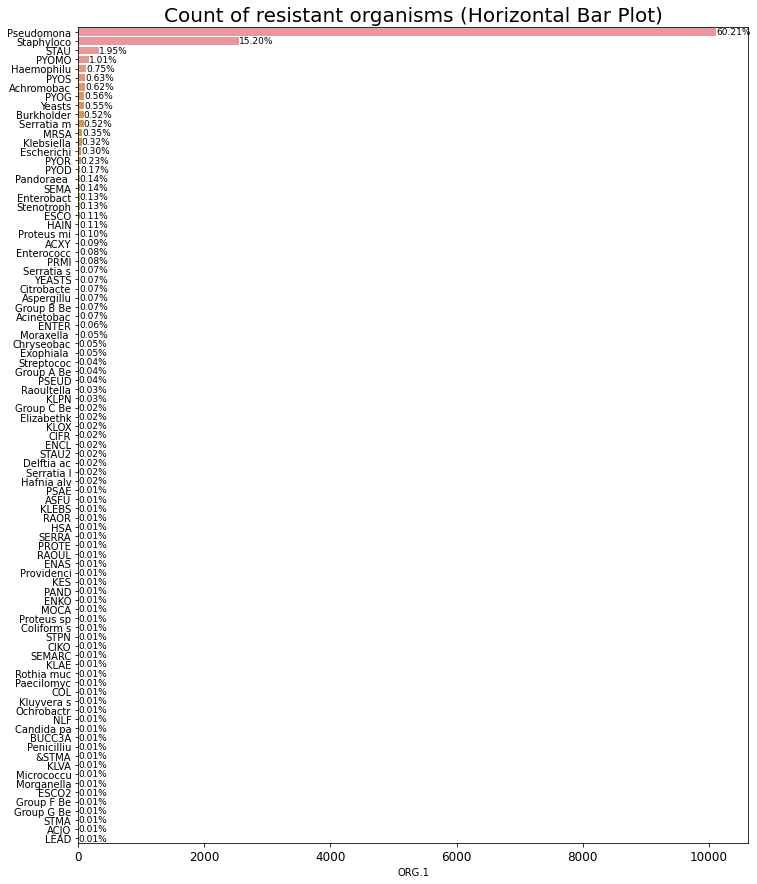

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

def count_horizontal_bar_plot(df, col_name, title="", fig_height=15, fig_width=12, save_fig_name=None):
    plt.figure(figsize=(fig_width, fig_height))
    plt.xticks(fontsize=12)
    plt.title(title, fontsize=20)
    ax = sns.barplot(data=df, y=df[col_name].value_counts().index, x=df[col_name].value_counts())
    total = len(df[col_name])
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width() / total)
        x = p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y), ha='left', va='center', fontsize=9, color='black')
    
    if save_fig_name is None:
        return plt
    else:
        plt.savefig(save_fig_name + ".png", dpi=300, bbox_inches='tight')
        return plt

# Call the function with your desired parameters
count_horizontal_bar_plot(mc, "ORG.1", title="Count of resistant organisms (Horizontal Bar Plot)", fig_height=15, fig_width=12, save_fig_name='resistant_organisms_count_horizontal_bar_plot')


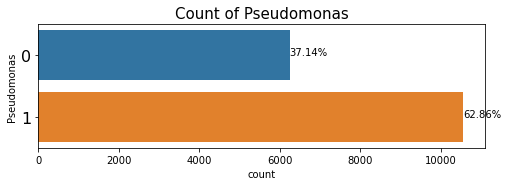

In [64]:
count_plot(mc,"Pseudomonas",title="Count of Pseudomonas",fig_height=5,fig_width=8, save_fig_name='Pseudonmonas_bar_plot').show()

In [65]:

mc['ORG'] = mc['ORG'].str.split(',')

In [66]:

mc.head(10)

,StudyNumber,Date,ORG,NumberOrganism,ORG.1,Pseudomonas,Specimen,Ciprofloxacin,Ceftazidime,Meropenem,Pip/Tazo,Tob,MDR
0,205,2012-11-30,"[PYOMO, PYOS, STAU]",NaN,PYOMO,1,"C,22.0443043.FA",R,R,R,I,NaN,1.0
1,205,2012-11-30,"[PYOMO, PYOS, STAU]",NaN,PYOS,1,"C,22.0443043.FA",R,R,R,I,NaN,1.0
2,205,2012-11-30,"[PYOMO, PYOS, STAU]",NaN,STAU,0,"C,22.0443043.FA",I,NaN,NaN,NaN,NaN,NaN
3,41,2013-01-01,"[PYOG, PYOMO, STAU]",NaN,Pseudomona,1,"C,13.0140020.BA",R,R,S,R,S,1.0
4,41,2013-01-01,"[PYOG, PYOMO, STAU]",NaN,Pseudomona,1,"C,13.0140020.BA",I,S,S,S,S,0.0
5,41,2013-01-01,"[PYOG, PYOMO, STAU]",NaN,Staphyloco,0,"C,13.0140020.BA",S,NaN,NaN,NaN,NaN,NaN
6,37,2013-01-02,"[PYOG, PYOMO, PYOR]",NaN,Pseudomona,1,"C,13.0140068.TA",I,R,R,R,S,1.0
7,37,2013-01-02,"[PYOG, PYOMO, PYOR]",NaN,Pseudomona,1,"C,13.0140068.TA",S,S,S,S,S,0.0
8,37,2013-01-02,"[PYOG, PYOMO, PYOR]",NaN,Pseudomona,1,"C,13.0140068.TA",S,S,S,S,S,0.0
9,55,2013-01-02,"[BUVI, MRSA]",NaN,Staphyloco,0,"C,13.0140069.MA",R,R,R,NaN,R,NaN


In [67]:
Ivabx = Ivabx[Ivabx['IVDays'] != 1]


In [68]:
mc['Ciprofloxacin'] = mc['Ciprofloxacin'].replace(['S', 'I'], 0)

mc['Ciprofloxacin'] = mc['Ciprofloxacin'].replace('R', 1)

mc['Ceftazidime'] = mc['Ceftazidime'].replace(['S', 'I'], 0)

mc['Ceftazidime'] = mc['Ceftazidime'].replace('R', 1)

mc['Meropenem'] = mc['Meropenem'].replace(['S', 'I'], 0)

mc['Meropenem'] = mc['Meropenem'].replace('R', 1)

mc['Pip/Tazo'] = mc['Pip/Tazo'].replace(['S', 'I'], 0)

mc['Pip/Tazo'] = mc['Pip/Tazo'].replace('R', 1)

mc['Tob'] = mc['Tob'].replace(['S', 'I'], 0)

mc['Tob'] = mc['Tob'].replace('R', 1)


In [69]:
# Missing values
print("IVabx Data proportion of missing values observed in --")
print(Ivabx.isna().sum()[Ivabx.isna().sum()>0] / len(Ivabx) * 100)

print("\nMicroCombined Data proportion of missing values observed in --")
print(mc.isna().sum()[mc.isna().sum()>0] / len(mc) * 100)

#print("\nMerged Data total missing values observed in --")
#print(mergedAMR.isna().sum()[mergedAMR.isna().sum()>0] / len(mergedAMR) * 100)

print("Shape: IVabx: {}, MicroCombined:{}".format(Ivabx.shape,mc.shape))
#print("Shape: MergedDATA: {}".format(mergedAMR.shape))

IVabx Data proportion of missing values observed in --
AdmFev          28.991078
DiscFev         28.991078
DelFev          28.991078
Stopped          0.041181
DeceasedDate    76.019218
dtype: float64

MicroCombined Data proportion of missing values observed in --
NumberOrganism    100.000000
ORG.1              13.744048
Specimen           13.744048
Ciprofloxacin      16.077381
Ceftazidime        30.428571
Meropenem          26.928571
Pip/Tazo           29.809524
Tob                48.875000
MDR                37.190476
dtype: float64
Shape: IVabx: (7285, 18), MicroCombined:(16800, 13)


In [70]:
mc = mc.drop("NumberOrganism", axis=1)
#mc = mc.drop("Date", axis=1)

C:\Users\sarah\AppData\Local\Temp\ipykernel_11796\3949245628.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(unique_values, rotation=90)


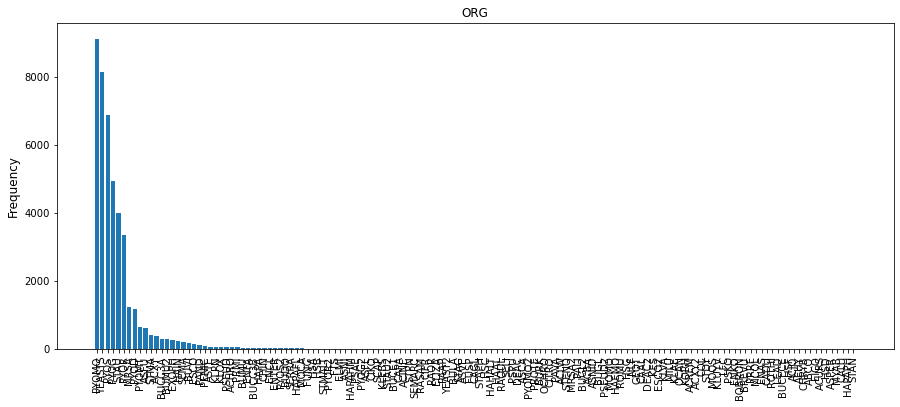

In [71]:
# Get unique items & counts
unique_values = mc["ORG"].explode().value_counts().index.tolist()
unique_value_counts = mc["ORG"].explode().value_counts().values

# Create plot
fig, ax = plt.subplots(figsize = (15,6))
ax.bar(unique_values, unique_value_counts)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("ORG", size = 12)
ax.set_xticklabels(unique_values, rotation=90)
ax.tick_params(axis='x')
plt.subplots_adjust(wspace=10)
plt.savefig('org_counts.png')

plt.show()

In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Convert the lists in the 'ORG' column to strings
mc['ORG'] = mc['ORG'].apply(lambda x: ','.join(x))

# Split the data into categorical and numerical columns
cat_cols = ['ORG.1', 'ORG', 'Pseudomonas','Ciprofloxacin','Ceftazidime','Meropenem','Pip/Tazo','Tob']
num_cols = ['MDR']

# Define the preprocessing steps for categorical and numerical data
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_cols),
        ('num', num_transformer, num_cols)
    ])

processed_data = preprocessor.fit_transform(mc)

# Get the column names after one-hot encoding
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names(cat_cols)

# Combine data
processed_df = pd.DataFrame(processed_data, columns=np.concatenate((cat_feature_names, num_cols)))



C:\Users\sarah\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [73]:
column_names = processed_df.columns
print(column_names)


Index(['ORG.1_&STMA', 'ORG.1_ACJO', 'ORG.1_ACXY', 'ORG.1_ASFU',
       'ORG.1_Achromobac', 'ORG.1_Acinetobac', 'ORG.1_Aspergillu',
       'ORG.1_BUCC3A', 'ORG.1_Burkholder', 'ORG.1_CIFR',
       ...
       'Ciprofloxacin_1.0', 'Ceftazidime_0.0', 'Ceftazidime_1.0',
       'Meropenem_0.0', 'Meropenem_1.0', 'Pip/Tazo_0.0', 'Pip/Tazo_1.0',
       'Tob_0.0', 'Tob_1.0', 'MDR'],
      dtype='object', length=1345)


In [74]:
mc['ORG'] = mc['ORG'].str.split(',')

In [75]:
# Get unique items & counts
unique_values = mc["ORG"].explode().value_counts().index.tolist()
unique_value_counts = mc["ORG"].explode().value_counts().values


In [76]:
def boolean_df(item_lists, unique_items):
    bool_dict = {}

    for item in unique_items:
        bool_dict[item] = item_lists.apply(lambda x: 1 if item in x else 0)

    return pd.DataFrame(bool_dict)


org_bool = boolean_df(
  item_lists = mc["ORG"],
  unique_items = unique_values
)

In [77]:
org_bool

,PYOMO,YEASTS,PYOS,PYOG,STAU,PYOR,MRSA,PYOD,PYOMT,ASFU,...,CHRYB,ABCO,EICO,ACURS,HSD,ASPER,MYAB,CALU,HAPAPH,STAN
0,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16796,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16797,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16798,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
merged_df = mc.merge(org_bool, left_index=True, right_index=True)


In [79]:
merged_df.head(3)

,StudyNumber,Date,ORG,ORG.1,Pseudomonas,Specimen,Ciprofloxacin,Ceftazidime,Meropenem,Pip/Tazo,...,CHRYB,ABCO,EICO,ACURS,HSD,ASPER,MYAB,CALU,HAPAPH,STAN
0,205,2012-11-30,"[PYOMO, PYOS, STAU]",PYOMO,1,"C,22.0443043.FA",1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,205,2012-11-30,"[PYOMO, PYOS, STAU]",PYOS,1,"C,22.0443043.FA",1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,205,2012-11-30,"[PYOMO, PYOS, STAU]",STAU,0,"C,22.0443043.FA",0.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [80]:
merged_df = merged_df.drop("ORG", axis=1)
merged_df.shape


(16800, 152)

In [81]:
merged_df = merged_df.dropna()
merged_df.shape

(7724, 152)

In [82]:
merged_df = merged_df.rename(columns={'Pip/Tazo': 'PipTazo'})
merged_df.to_csv("mergedMc.csv",index=False)

In [83]:
merged_df.shape

(7724, 152)

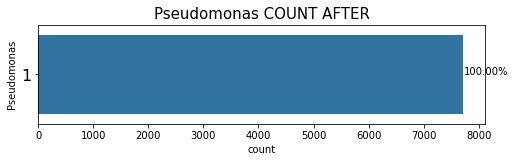

In [84]:
count_plot(merged_df,"Pseudomonas",title="Pseudomonas COUNT AFTER",fig_height=4,fig_width=8).show()

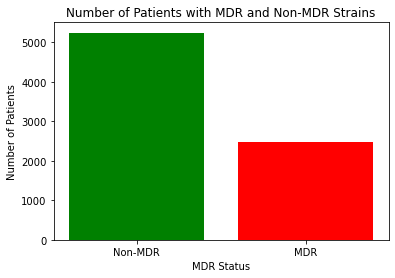

In [85]:
import matplotlib.pyplot as plt

mdr_counts = merged_df['MDR'].value_counts()
mdr_labels = ['Non-MDR', 'MDR']
colors = ['green', 'red']
plt.bar(mdr_labels, mdr_counts, color=colors)
plt.title('Number of Patients with MDR and Non-MDR Strains')
plt.xlabel('MDR Status')
plt.ylabel('Number of Patients')
plt.savefig('mdr_counts.png')

plt.show()



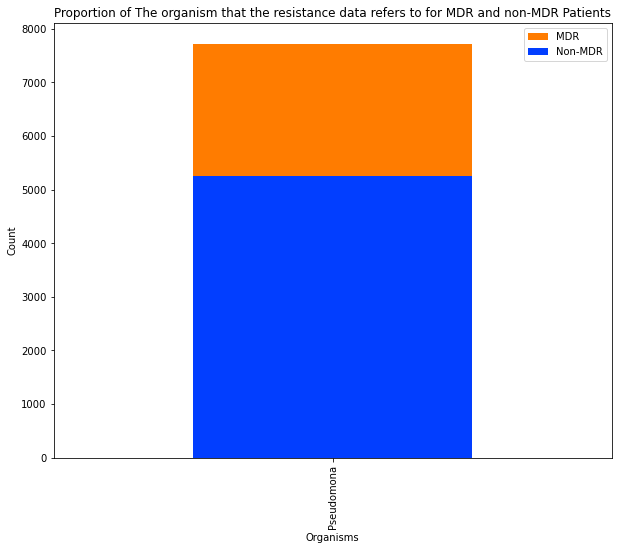

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('bright')

pivot_table = merged_df.pivot_table(index='ORG.1', columns='MDR', values='StudyNumber', aggfunc='count')

ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10,8))
ax.set_title('Proportion of The organism that the resistance data refers to for MDR and non-MDR Patients')
ax.set_xlabel('Organisms')
ax.set_ylabel('Count')
handles, labels = ax.get_legend_handles_labels()
labels = ['Non-MDR', 'MDR']
ax.legend(reversed(handles), reversed(labels), loc='upper right')
plt.savefig('proportion_resistance_mdr.png')


In [87]:
merged_df.groupby(['ORG.1','MDR'])['MDR'].count()

ORG.1       MDR
Pseudomona  0.0    5244
            1.0    2480
Name: MDR, dtype: int64

In [88]:
mc = mc.dropna()
mc.shape

(7724, 12)

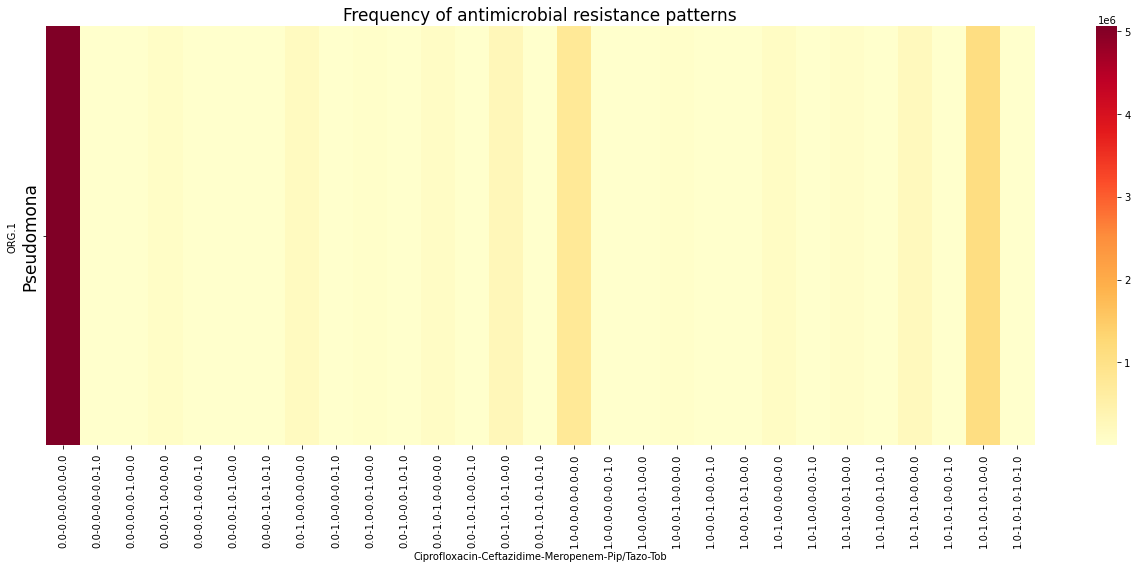

In [91]:
# create a new column 'count' to calculate the frequency of each strain-antibiotic combination
mc['count'] = mc.groupby(['Ciprofloxacin', 'Ceftazidime', 'Meropenem', 'Pip/Tazo', 'Tob'])['ORG.1'].transform('size')

# create a heatmap using seaborn library
import seaborn as sns
import matplotlib.pyplot as plt

# set the figure size
plt.figure(figsize=(18, 8))

# create the heatmap
heatmap = sns.heatmap(
    mc.pivot_table(values='count', index='ORG.1', columns=['Ciprofloxacin', 'Ceftazidime', 'Meropenem', 'Pip/Tazo', 'Tob'], aggfunc='sum'),
    cmap='YlOrRd'
)

# set the title
plt.title('Frequency of antimicrobial resistance patterns', fontsize=17)

# increase the size of the labels on the y-axis
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=17)

# adjust the layout to prevent label cutoff
plt.tight_layout()

# save the figure
plt.savefig('heatmap_pseudomonas_antibioCombination.png')

# show the plot
plt.show()


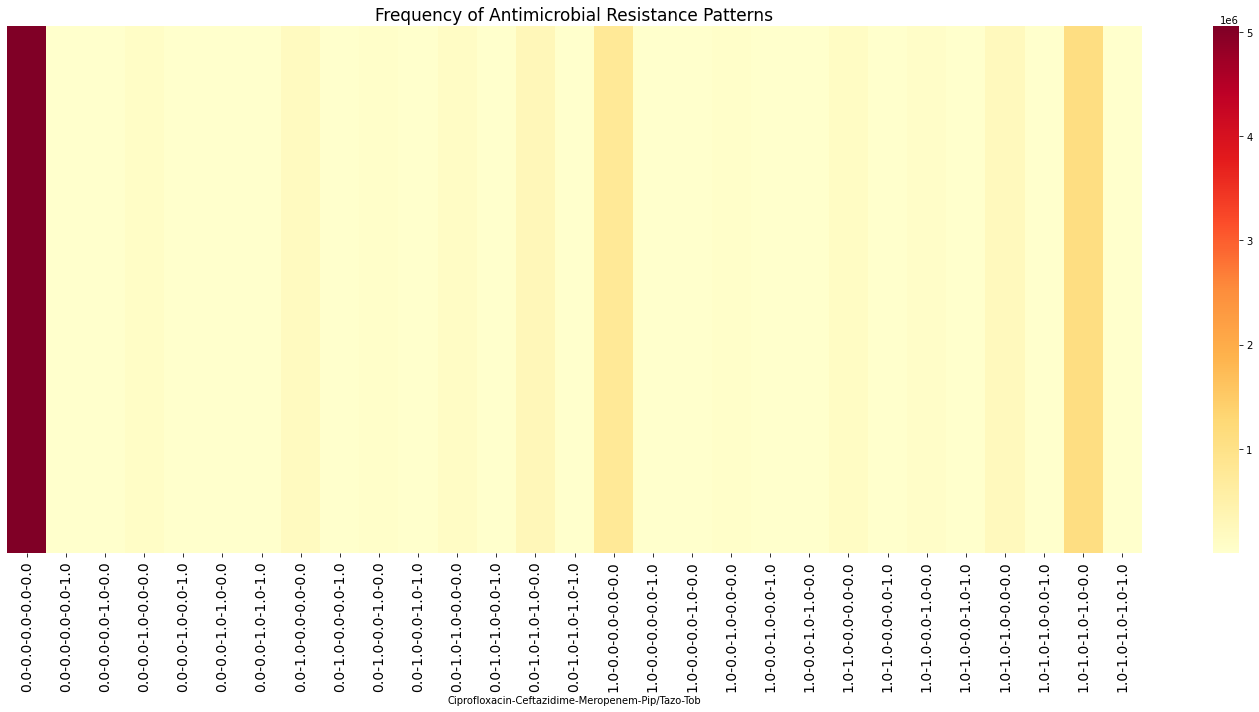

In [121]:
# Create a new column 'count' to calculate the frequency of each strain-antibiotic combination
mc['count'] = mc.groupby(['Ciprofloxacin', 'Ceftazidime', 'Meropenem', 'Pip/Tazo', 'Tob'])['ORG.1'].transform('size')

# Create a heatmap using seaborn library
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 10))

# Create the heatmap
heatmap = sns.heatmap(
    mc.pivot_table(values='count', columns=['Ciprofloxacin', 'Ceftazidime', 'Meropenem', 'Pip/Tazo', 'Tob'], aggfunc='sum'),
    cmap='YlOrRd'
)

plt.yticks([])

# Set x-axis tick labels with increased font size and rotation
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, fontsize=21)

plt.title('Frequency of Antimicrobial Resistance Patterns', fontsize=17)

# Set font size for x-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)

plt.tight_layout()
plt.savefig('heatmap_pseudomonas_antibioCombination.png', dpi=400, bbox_inches='tight')

# Show the plot
plt.show()


In [302]:
mc.dropna()
mc.head(4)


,StudyNumber,Date,ORG,ORG.1,Pseudomonas,Specimen,Ciprofloxacin,Ceftazidime,Meropenem,Pip/Tazo,Tob,MDR
0,205,2012-11-30,"[PYOMO, PYOS, STAU]",PYOMO,1,"C,22.0443043.FA",1.0,1.0,1.0,0.0,NaN,1.0
1,205,2012-11-30,"[PYOMO, PYOS, STAU]",PYOS,1,"C,22.0443043.FA",1.0,1.0,1.0,0.0,NaN,1.0
2,205,2012-11-30,"[PYOMO, PYOS, STAU]",STAU,0,"C,22.0443043.FA",0.0,NaN,NaN,NaN,NaN,NaN
3,41,2013-01-01,"[PYOG, PYOMO, STAU]",Pseudomona,1,"C,13.0140020.BA",1.0,1.0,0.0,1.0,0.0,1.0


In [304]:
mcModified = pd.read_csv("mc.csv")

In [305]:
mcModified.head(4)

,StudyNumber,Date,ORG,ORG.1,Pseudomonas,Specimen,Ciprofloxacin,Ceftazidime,Meropenem,Pip/Tazo,Tob,MDR
0,205,2012-11-30,"['PYOMO', 'PYOS', 'STAU']",PYOMO,1,"C,22.0443043.FA",1.0,1.0,1.0,0.0,NaN,1.0
1,205,2012-11-30,"['PYOMO', 'PYOS', 'STAU']",PYOS,1,"C,22.0443043.FA",1.0,1.0,1.0,0.0,NaN,1.0
2,205,2012-11-30,"['PYOMO', 'PYOS', 'STAU']",STAU,0,"C,22.0443043.FA",0.0,NaN,NaN,NaN,NaN,NaN
3,41,2013-01-01,"['PYOG', 'PYOMO', 'STAU']",Pseudomona,1,"C,13.0140020.BA",1.0,1.0,0.0,1.0,0.0,1.0


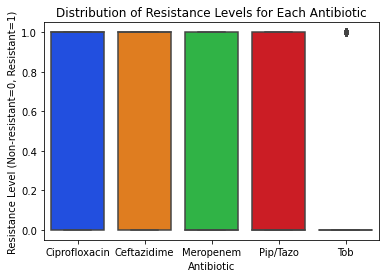

In [307]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the mapping of resistance levels to numeric values
resistance_map = {1.0: 1, 0.0: 0, np.nan: None}

# Convert the resistance levels to numeric values
for col in ['Ciprofloxacin', 'Ceftazidime', 'Meropenem', 'Pip/Tazo', 'Tob']:
    mcModified[col] = mcModified[col].map(resistance_map)

# Create the box plot
ax = sns.boxplot(data=mcModified[['Ciprofloxacin', 'Ceftazidime', 'Meropenem', 'Pip/Tazo', 'Tob']])
ax.set_title('Distribution of Resistance Levels for Each Antibiotic')
ax.set_xlabel('Antibiotic')
ax.set_ylabel('Resistance Level (Non-resistant=0, Resistant=1)')

plt.savefig('boxplot_resistance_level.png')
plt.show()


In [308]:
mcModified.isnull().sum()


StudyNumber         0
Date                0
ORG                 0
ORG.1            2309
Pseudomonas         0
Specimen         2309
Ciprofloxacin    2701
Ceftazidime      5112
Meropenem        4524
Pip/Tazo         5008
Tob              8211
MDR              6248
dtype: int64

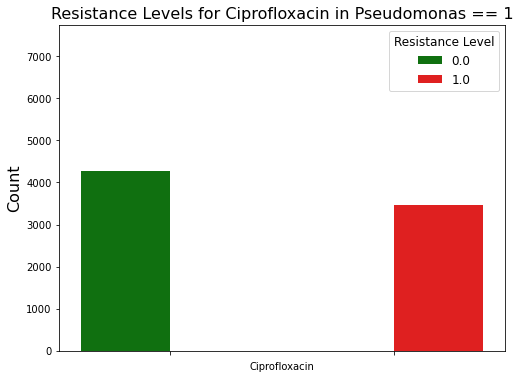

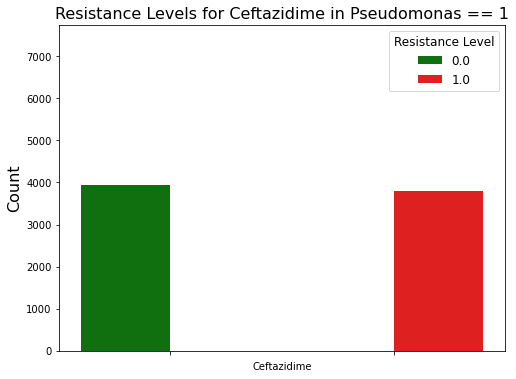

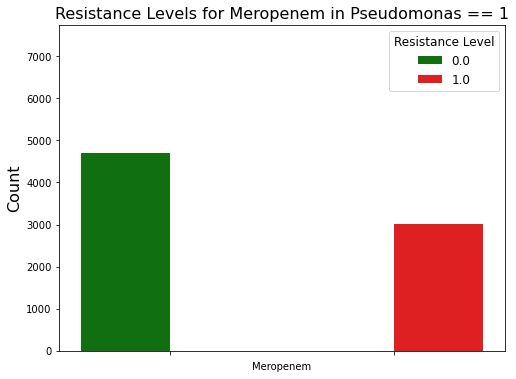

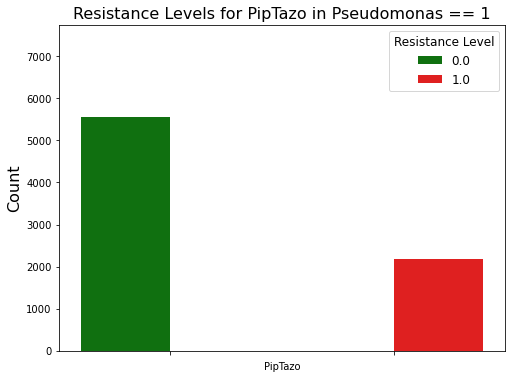

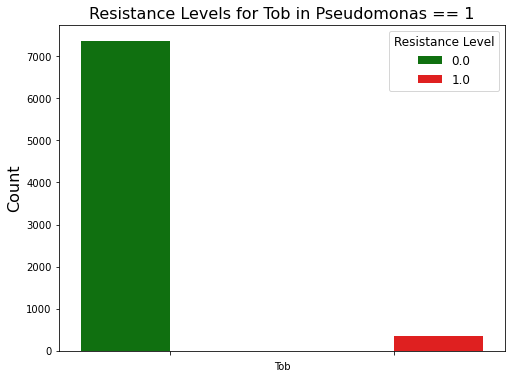

In [309]:
import seaborn as sns
import matplotlib.pyplot as plt

pseudomonas_df = merged_df[merged_df['Pseudomonas'] == 1]

resistance_order = [0, 1]

max_count = pseudomonas_df[['Ciprofloxacin', 'Ceftazidime', 'Meropenem', 'PipTazo', 'Tob']].value_counts().max()

for antibiotic in ['Ciprofloxacin', 'Ceftazidime', 'Meropenem', 'PipTazo', 'Tob']:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=antibiotic, hue=antibiotic, data=pseudomonas_df, order=resistance_order,
                       palette={0: 'green', 1: 'red'})
    ax.set_title(f'Resistance Levels for {antibiotic} in Pseudomonas == 1', fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
    
    ax.set_ylim(0, max_count + 5500)  

    plt.legend(title='Resistance Level', fontsize=12, title_fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=38)


    ax.set_xticklabels([])

    plt.savefig(f'{antibiotic}_resistance_pseudomonas.png', dpi=100)
    plt.show()


In [310]:
# Filter the merged_df dataframe to include only rows where Pseudomonas column equals 1
pseudomonas_df = merged_df[merged_df['Pseudomonas'] == 1]
pseudomonas_df.shape

(7724, 152)

In [311]:
pseudomonas_df.head(4)

,StudyNumber,Date,ORG.1,Pseudomonas,Specimen,Ciprofloxacin,Ceftazidime,Meropenem,PipTazo,Tob,...,CHRYB,ABCO,EICO,ACURS,HSD,ASPER,MYAB,CALU,HAPAPH,STAN
3,41,2013-01-01,Pseudomona,1,"C,13.0140020.BA",1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,41,2013-01-01,Pseudomona,1,"C,13.0140020.BA",0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,37,2013-01-02,Pseudomona,1,"C,13.0140068.TA",0.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,37,2013-01-02,Pseudomona,1,"C,13.0140068.TA",0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


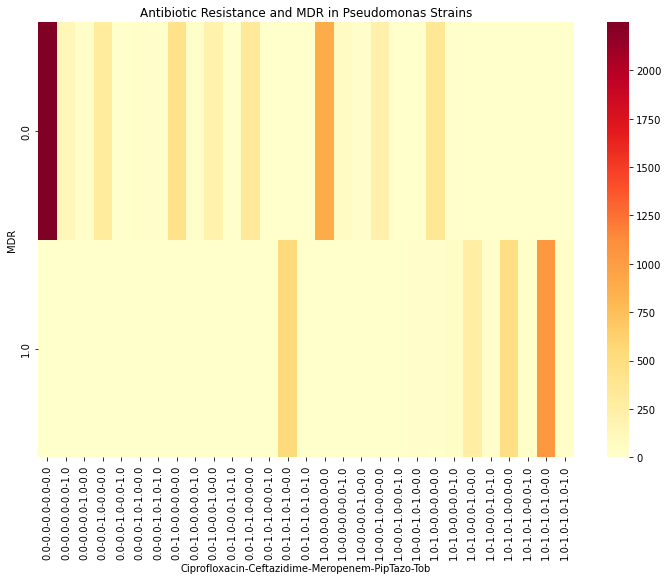

In [312]:
import seaborn as sns
import matplotlib.pyplot as plt

pseudomonas_df = merged_df[merged_df['Pseudomonas'] == 1]

columns = ['Ciprofloxacin', 'Ceftazidime', 'Meropenem', 'PipTazo', 'Tob', 'MDR']

heatmap_data = pseudomonas_df.pivot_table(index='MDR', columns=columns[:-1], aggfunc='size', fill_value=0)

fig = plt.figure(figsize=(12, 8)) # <-- increase the size of the figure

sns.heatmap(heatmap_data, cmap='YlOrRd', fmt='d')

plt.title('Antibiotic Resistance and MDR in Pseudomonas Strains')
plt.savefig('Antibiotic Resistance and MDR in Pseudomonas Strains.png')

plt.show()


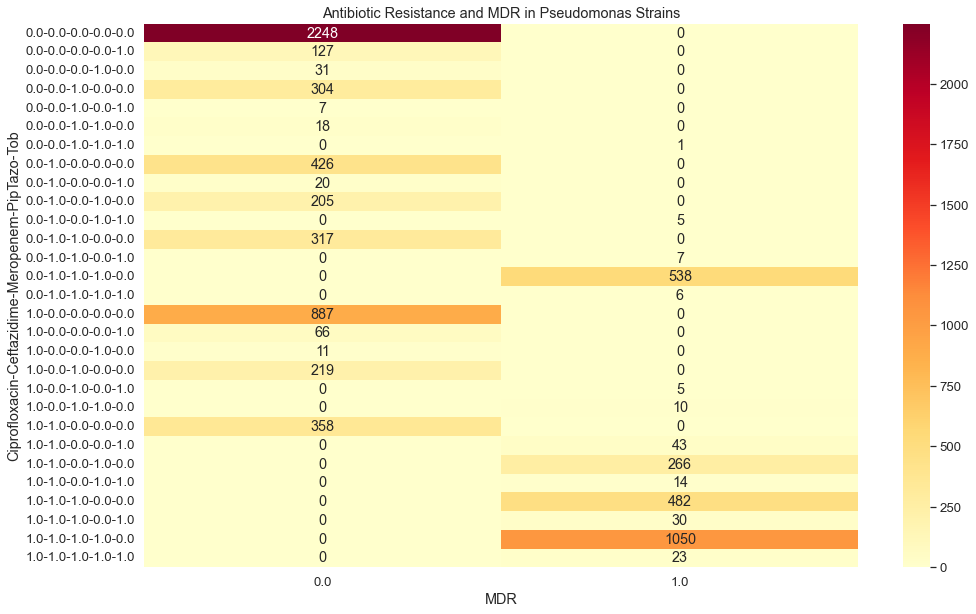

In [358]:
import seaborn as sns
import matplotlib.pyplot as plt

pseudomonas_df = merged_df[merged_df['Pseudomonas'] == 1]

columns = ['Ciprofloxacin', 'Ceftazidime', 'Meropenem', 'PipTazo', 'Tob', 'MDR']

# Group the same combinations of resistance levels
heatmap_data = pseudomonas_df.pivot_table(index=columns[:-1], columns='MDR', aggfunc='size', fill_value=0)

fig = plt.figure(figsize=(16, 10)) # Increase the size of the figure

sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='d')

plt.title('Antibiotic Resistance and MDR in Pseudomonas Strains')
plt.savefig('Antibiotic Resistance and MDR in Pseudomonas Strains.png')

plt.show()


IVABX 

In [328]:
Ivabx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 402 to 8357
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   StudyNum           739 non-null    int64         
 1   ValidLungFunction  739 non-null    bool          
 2   Type               739 non-null    object        
 3   Year               739 non-null    int64         
 4   Month              739 non-null    int64         
 5   LOS                739 non-null    object        
 6   Admitted           739 non-null    datetime64[ns]
 7   AdmCode            739 non-null    int64         
 8   AdmFev             739 non-null    float64       
 9   Discharged         739 non-null    datetime64[ns]
 10  DiscFev            739 non-null    float64       
 11  DelFev             739 non-null    float64       
 12  Medication         739 non-null    object        
 13  Requested          739 non-null    datetime64[ns]
 14  Stopped

In [330]:
Ivabx.isnull().sum()


StudyNum                0
ValidLungFunction       0
Type                    0
Year                    0
Month                   0
LOS                     0
Admitted                0
AdmCode                 0
AdmFev               2507
Discharged              0
DiscFev              2507
DelFev               2507
Medication              0
Requested               0
Stopped                 3
OrderStatusCode         0
IVDays                  0
DeceasedDate         6358
dtype: int64

In [331]:
Ivabx = Ivabx.dropna()
Ivabx.head(5)


,StudyNum,ValidLungFunction,Type,Year,Month,LOS,Admitted,AdmCode,AdmFev,Discharged,DiscFev,DelFev,Medication,Requested,Stopped,OrderStatusCode,IVDays,DeceasedDate
402,7,True,Inpatient,2013,8,15,2013-08-08,741494,56.0,2013-08-23,61.0,5.0,Ceftazidime,2013-08-08,2013-08-16,DISC,9,2020-03-22 10:45:00
403,7,True,Inpatient,2013,8,15,2013-08-08,741494,56.0,2013-08-23,61.0,5.0,Colistimethate,2013-08-08,2013-08-16,DISC,9,2020-03-22 10:45:00
404,7,True,Inpatient,2013,8,15,2013-08-08,741494,56.0,2013-08-23,61.0,5.0,Tobramycin,2013-08-16,2013-08-19,DISC,4,2020-03-22 10:45:00
405,7,True,Inpatient,2013,8,15,2013-08-08,741494,56.0,2013-08-23,61.0,5.0,Meropenem,2013-08-16,2013-08-23,DISCD,8,2020-03-22 10:45:00
406,7,True,Inpatient,2013,8,15,2013-08-08,741494,56.0,2013-08-23,61.0,5.0,Tobramycin,2013-08-19,2013-08-23,DISCD,5,2020-03-22 10:45:00


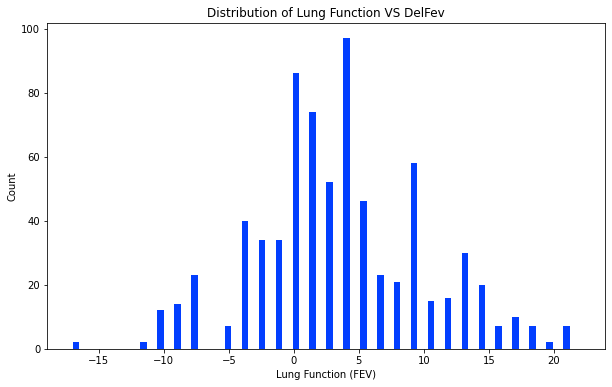

In [317]:
plt.figure(figsize=(10, 6)) # set the figure size to 10x6 inches
plt.hist(Ivabx['DelFev'], bins=30, width=0.5)
plt.xlabel('Lung Function (FEV)')
plt.ylabel('Count')
plt.title('Distribution of Lung Function VS DelFev')
plt.savefig('Distribution of Lung Function VS DelFev.png')
plt.show()


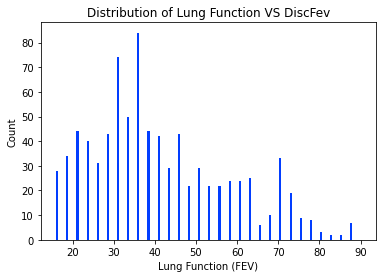

In [ ]:

Ivabx = Ivabx[Ivabx['ValidLungFunction'] == True]


plt.hist(Ivabx['DiscFev'], bins=30, width=0.5)

plt.xlabel('Lung Function (FEV)')
plt.ylabel('Count')
plt.title('Distribution of Lung Function VS DiscFev')

plt.savefig('Distribution of Lung Function VS DiscFe.png')

plt.show()


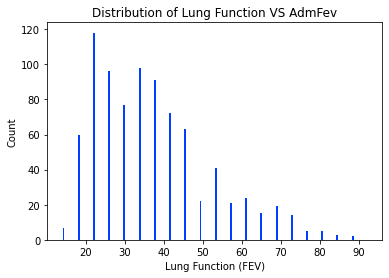

In [ ]:

Ivabx = Ivabx[Ivabx['ValidLungFunction'] == True]

plt.hist(Ivabx['AdmFev'], bins=20, width=0.5)

plt.xlabel('Lung Function (FEV)')
plt.ylabel('Count')
plt.title('Distribution of Lung Function VS AdmFev')
plt.savefig('Distribution of Lung Function VS AdmFev.png')

plt.show()


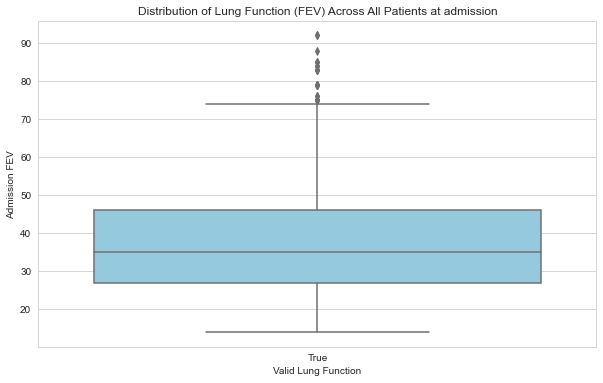

In [ ]:

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x=Ivabx["ValidLungFunction"], y=Ivabx["AdmFev"], color="skyblue")
plt.xlabel("Valid Lung Function")
plt.ylabel("Admission FEV")
plt.title("Distribution of Lung Function (FEV) Across All Patients at admission")
plt.savefig('Distribution of Lung Function (FEV) Across All Patients at admission to hospital.png')

plt.show()


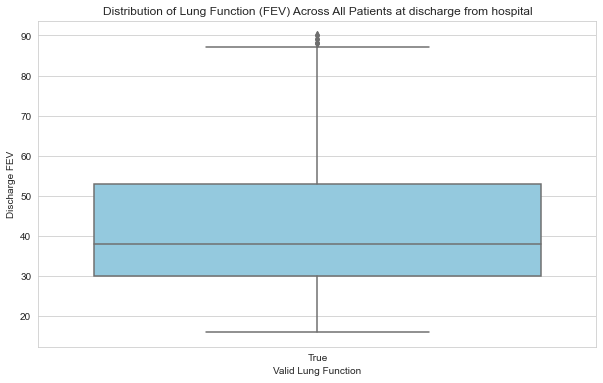

In [ ]:

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x=Ivabx["ValidLungFunction"], y=Ivabx["DiscFev"], color="skyblue")
plt.xlabel("Valid Lung Function")
plt.ylabel("Discharge FEV")
plt.title("Distribution of Lung Function (FEV) Across All Patients at discharge from hospital")
plt.savefig('Distribution of Lung Function (FEV) Across All Patients at discharge.png')

plt.show()

Correlation coefficient: 0.9221733534471


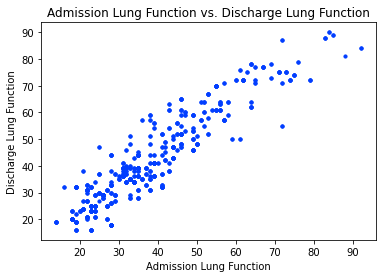

In [318]:

admission_lung_function = Ivabx['AdmFev']
discharge_lung_function = Ivabx['DiscFev']

plt.scatter(admission_lung_function, discharge_lung_function , s=10)
plt.title('Admission Lung Function vs. Discharge Lung Function')
plt.xlabel('Admission Lung Function')
plt.ylabel('Discharge Lung Function')

correlation_coefficient = np.corrcoef(admission_lung_function, discharge_lung_function)[0,1]
print("Correlation coefficient:", correlation_coefficient)
plt.savefig('Admission Lung Function vs. Discharge Lung Function.png')

plt.show()


Correlation coefficient: -0.049982565685031156


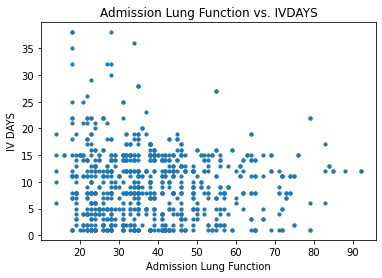

In [ ]:
admission_lung_function = Ivabx['AdmFev']
IV = Ivabx['IVDays']

plt.scatter(admission_lung_function, IV , s=10)
plt.title('Admission Lung Function vs. IVDAYS')
plt.xlabel('Admission Lung Function')
plt.ylabel('IV DAYS')

correlation_coefficient = np.corrcoef(admission_lung_function, IV)[0,1]
print("Correlation coefficient:", correlation_coefficient)
plt.savefig('Admission Lung Function vs. IV.png')

plt.show()

Correlation coefficient: nan


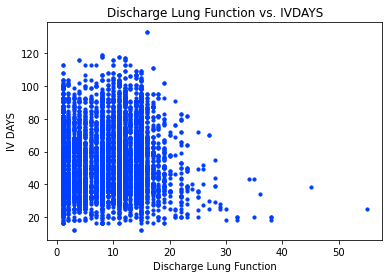

In [27]:
disc_lung_function = Ivabx['DiscFev']
IV = Ivabx['IVDays']

plt.scatter(IV, disc_lung_function , s=10)
plt.title('Discharge Lung Function vs. IVDAYS')
plt.xlabel('Discharge Lung Function')
plt.ylabel('IV DAYS')

correlation_coefficient = np.corrcoef(disc_lung_function, IV)[0,1]
print("Correlation coefficient:", correlation_coefficient)
plt.savefig('Discharge Lung Function vs. IV.png')

plt.show()

Correlation coefficient: nan


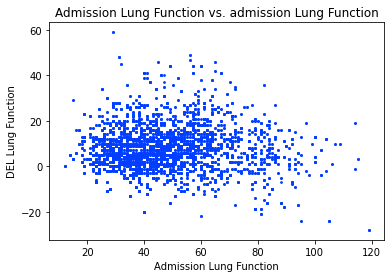

In [28]:

admission_lung_function = Ivabx['AdmFev']
del_lung_function = Ivabx['DelFev']

plt.scatter(admission_lung_function, del_lung_function , s=3)
plt.title('Admission Lung Function vs. admission Lung Function')
plt.xlabel('Admission Lung Function')
plt.ylabel('DEL Lung Function')

correlation_coefficient = np.corrcoef(admission_lung_function, del_lung_function)[0,1]
print("Correlation coefficient:", correlation_coefficient)
plt.savefig('DEL Lung Function vs. Admission Lung Function.png')

plt.show()


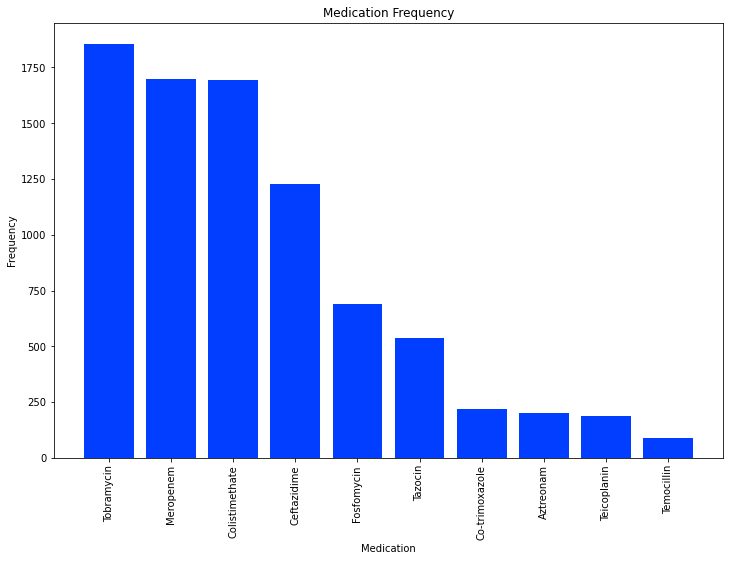

In [29]:
med_count = Ivabx['Medication'].value_counts()

# create a bar chart using the new DataFrame
fig = plt.figure(figsize=(12,8))
plt.bar(med_count.index, med_count.values)

# set chart title and axis labels
plt.title('Medication Frequency')
plt.xticks(rotation=90)

plt.xlabel('Medication')
plt.ylabel('Frequency')

plt.savefig('MED FREQUENCY.png')

# show the chart
plt.show()


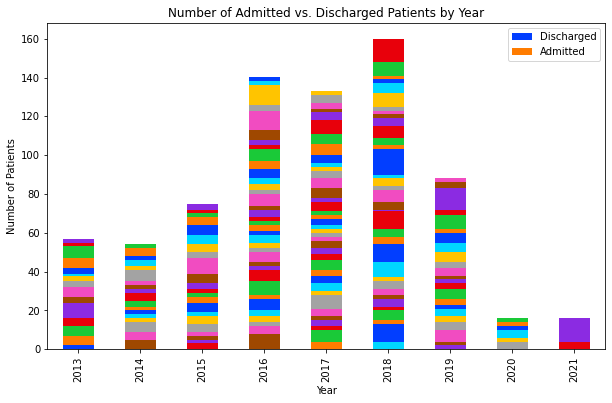

In [319]:

yearly_data = Ivabx.groupby(['Year', 'Admitted']).size().unstack(fill_value=0)

ax = yearly_data.plot(kind='bar', stacked=True, figsize=(10,6))

ax.set_title('Number of Admitted vs. Discharged Patients by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Patients')

ax.legend(['Discharged', 'Admitted'])
plt.savefig('Admission Lung Function vs. Discharge Lung Function.png')

plt.show()


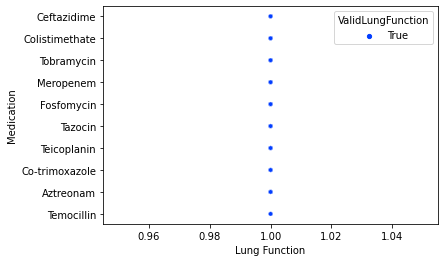

In [320]:

sns.scatterplot(data=Ivabx, x="ValidLungFunction", y="Medication", hue="ValidLungFunction", size="ValidLungFunction")
plt.xlabel("Lung Function")
plt.ylabel("Medication")

# Show plot
plt.show()


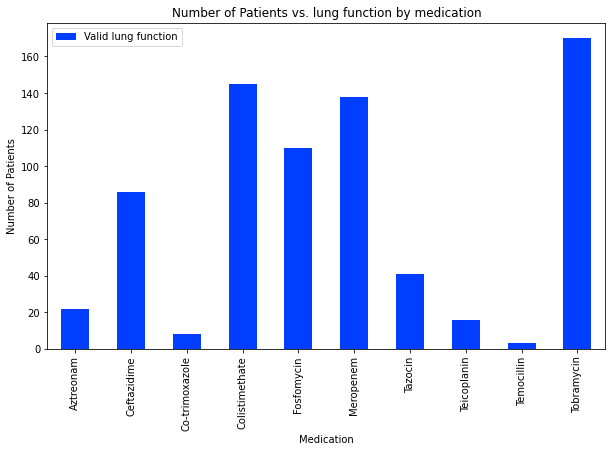

In [322]:
MED_data = Ivabx.groupby(['Medication', 'ValidLungFunction']).size().unstack(fill_value=0)

ax = MED_data.plot(kind='bar', stacked=True, figsize=(10,6))

ax.set_title('Number of Patients vs. lung function by medication')
ax.set_xlabel('Medication')
ax.set_ylabel('Number of Patients')

ax.legend(['Valid lung function', 'NOT VALID'])


plt.savefig('Number of Patients vs. lung function by medication.png')


plt.show()


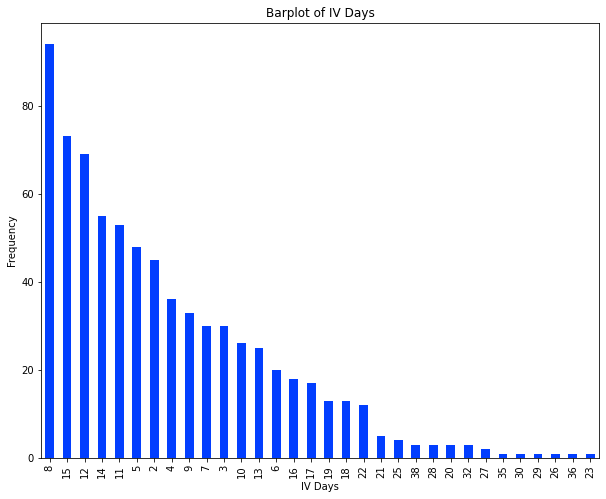

In [323]:
plt.figure(figsize=(10, 8))
ivdays_counts = Ivabx['IVDays'].value_counts()
ivdays_counts.plot(kind='bar')
plt.xlabel('IV Days')
plt.ylabel('Frequency')
plt.title('Barplot of IV Days')
plt.savefig('BarplotIVDAYS.png')
plt.show()


Correlation coefficient: nan


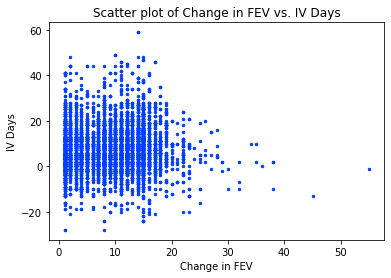

In [34]:
plt.scatter(Ivabx['IVDays'],Ivabx['DelFev'] , s=6)
plt.xlabel('Change in FEV')
plt.ylabel('IV Days')
plt.title('Scatter plot of Change in FEV vs. IV Days')
plt.savefig('Scatter plot of Change in FEV vs. IV Days.png')
correlation_coefficient = np.corrcoef(Ivabx['DelFev'], Ivabx['IVDays'])[0,1]
print("Correlation coefficient:", correlation_coefficient)
plt.show()


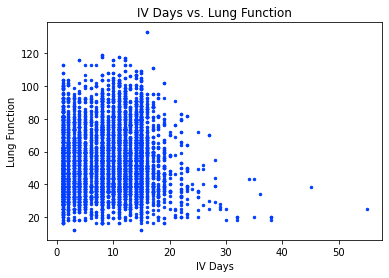

In [35]:

plt.scatter(Ivabx['IVDays'], Ivabx['DiscFev'], s=6)
plt.xlabel('IV Days')
plt.ylabel('Lung Function')
plt.title('IV Days vs. Lung Function')
plt.savefig('Scatter IV Days vs. Lung Function disc.png')

plt.show()


In [337]:
aua1_rows = Ivabx[Ivabx['OrderStatusCode'] == 'AUA1']
aua1_rows

,StudyNum,ValidLungFunction,Type,Year,Month,LOS,Admitted,AdmCode,AdmFev,Discharged,DiscFev,DelFev,Medication,Requested,Stopped,OrderStatusCode,IVDays,DeceasedDate
768,12,True,Inpatient,2019,7,14,2019-07-22,1243668,43.0,2019-08-05,38.0,-5.0,Tazocin,2019-08-05,2019-08-19,AUA1,15,2019-10-18 03:30:00
1798,37,True,Inpatient,2019,12,7,2019-12-09,3743808,41.0,2019-12-16,33.0,-8.0,Meropenem,2019-12-16,2019-12-30,AUA1,15,2021-12-10 03:10:00
1806,37,True,Inpatient,2020,1,7,2020-01-31,3743861,35.0,2020-02-07,36.0,1.0,Meropenem,2020-02-07,2020-02-25,AUA1,19,2021-12-10 03:10:00
1807,37,True,Inpatient,2020,1,7,2020-01-31,3743861,35.0,2020-02-07,36.0,1.0,Colistimethate,2020-02-07,2020-02-25,AUA1,19,2021-12-10 03:10:00


C:\Users\sarah\AppData\Local\Temp\ipykernel_8188\852890707.py:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\sarah\AppData\Local\Temp\ipykernel_8188\852890707.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator



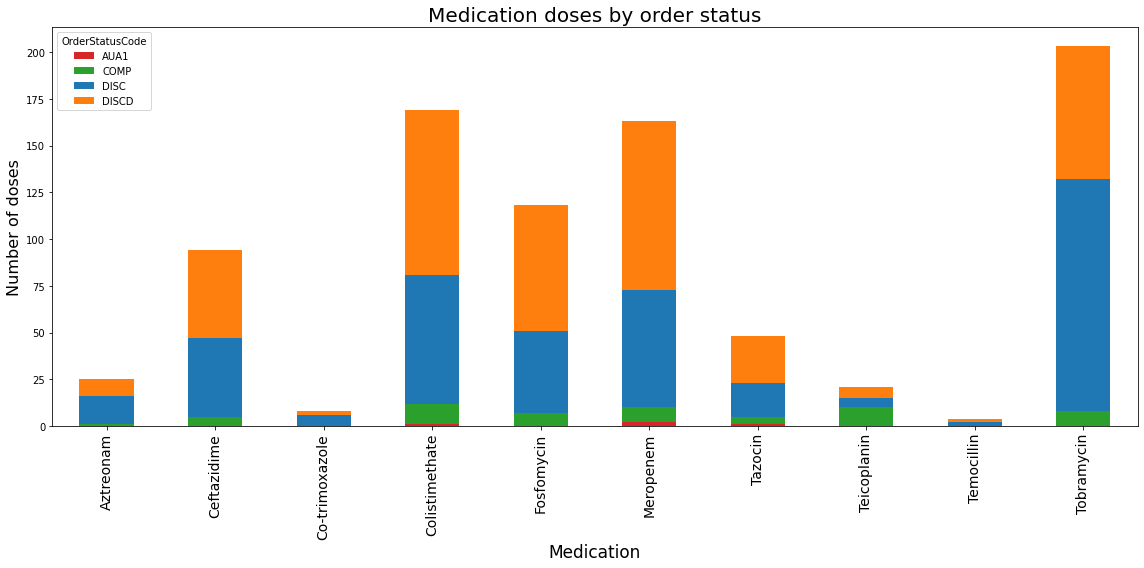

In [350]:
import pandas as pd
import matplotlib.pyplot as plt

# Get unique status values excluding 'AUA1'
status_values = Ivabx['OrderStatusCode'].unique()

# Define the custom color palette
color_palette = {'COMP': '#FFFF00', 'DISC': '#FF0000', 'DISCD': '#00FF00', 'AUA1': '#0000FF'}

# Assign colors to unique status values dynamically
color_palette.update({status: color for status, color in zip(status_values, plt.cm.tab10(range(len(status_values))))})

# Pivot the data
med_counts = pd.pivot_table(Ivabx, values='StudyNum', index='Medication', columns='OrderStatusCode', aggfunc='count')

# Create the bar plot
fig, ax = plt.subplots(figsize=(16, 8))
med_counts.plot(kind='bar', stacked=True, ax=ax, color=color_palette)

ax.set_title('Medication doses by order status', fontsize=20)
ax.set_xlabel('Medication', fontsize=17)
ax.set_ylabel('Number of doses', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.set_yticklabels(ax.get_yticks().astype(int), fontsize=10)


plt.tight_layout()
plt.savefig('Frequency of medication Vs STATUS.png')
plt.show()


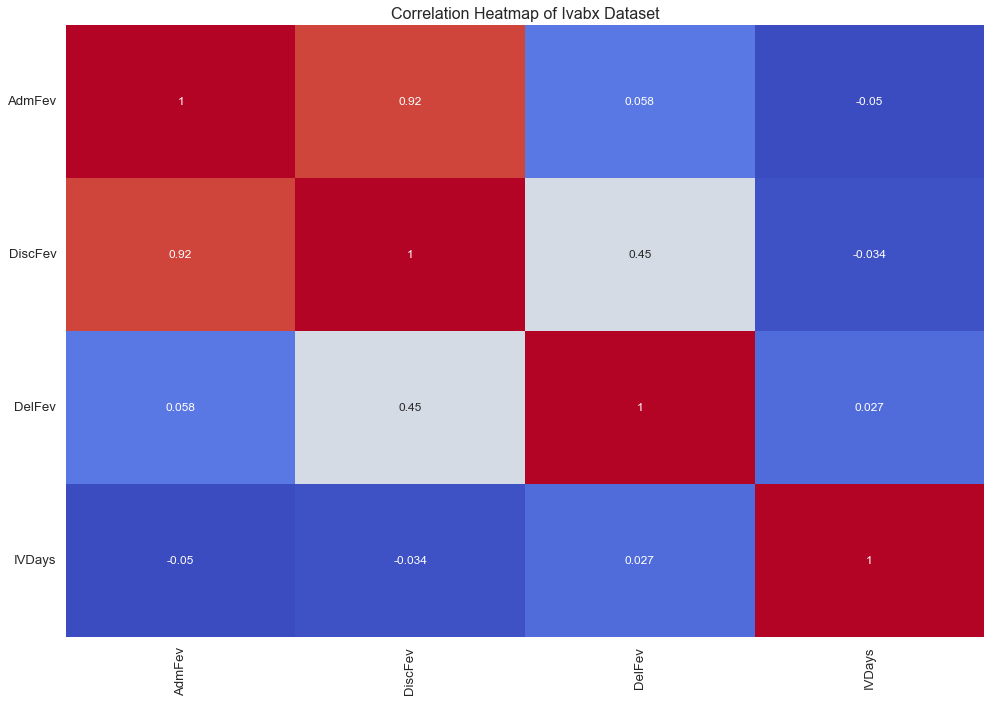

In [355]:
cols = [ 'LOS', 'AdmFev', 'DiscFev', 'DelFev', 'IVDays']

corr = Ivabx[cols].corr()

plt.figure(figsize=(14,10))
sns.set(font_scale=1.2)
heatmap = sns.heatmap(corr, cmap='coolwarm', annot=True, annot_kws={"size": 12}, cbar=False)

plt.title('Correlation Heatmap of Ivabx Dataset', fontsize=16)
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.tight_layout()
plt.savefig('HEATMAP IVABX.png')

plt.show()


In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Convert the lists in the 'ORG' column to strings
mc['ORG'] = mc['ORG'].apply(lambda x: ','.join(x))

# Split the data into categorical and numerical columns
cat_cols = ['ORG.1', 'ORG', 'Pseudomonas','Ciprofloxacin','Ceftazidime','Meropenem','Pip/Tazo','Tob']
num_cols = ['MDR']

# Define the preprocessing steps for categorical and numerical data
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_cols),
        ('num', num_transformer, num_cols)
    ])

processed_data = preprocessor.fit_transform(mc)

# Get the column names after one-hot encoding
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names(cat_cols)

# Combine data
processed_df = pd.DataFrame(processed_data, columns=np.concatenate((cat_feature_names, num_cols)))



C:\Users\sarah\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
Ivabx.shape

(8401, 18)